# Searching for QPPs with GPs for the ISSI Team

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd

import celerite
from celerite import terms
import emcee

from glob import glob
from astropy.io import fits

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [8]:
files = glob('../flares/*.fits')

/Users/davenpj3/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


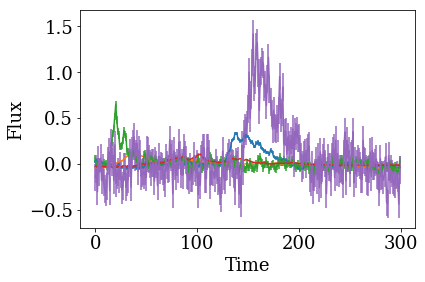

In [31]:
for k in range(5):

    hdu = fits.open(files[k])
    data = hdu[1].data
    hdu.close()

    time = data.field(0)
    
    medflux = np.nanmedian(data.field(1))
    
    flux = (data.field(1) - medflux) / medflux
    
    # find the typical (median) scatter in small chunks of the light curve 
    # (11 data points, arbitrarily chosen) to use as the error
    std = np.nanmedian(pd.rolling_std(flux, 11))
    err = np.ones(time.size) * std
    
    plt.errorbar(time, flux, yerr=err)

plt.xlabel('Time')
plt.ylabel('Flux')